In [17]:
import json
from serpapi import GoogleSearch
import requests
import io
import numpy as np    
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [18]:
with open("config.json", "r") as f:
    config = json.load(f)
    
key = config['key']

In [19]:
def search_images(query="cat doodle minimal"):
    params = {
        "tbm": "isch",
        "q": query,
        "api_key": key,
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    return results

In [20]:
def download_image(url):
    bin_img = requests.get(url).content
    img = Image.open(io.BytesIO(bin_img))
    return np.asarray(img)

# Google Images Doodles

In [6]:
classes = ["airplane", "car", "bird", "cat", "dog", "frog", "horse", "ship", "truck"]
# terms = ["doodle", "sketch"]
# terms = ["drawing easy", "doodle single"]
terms = ["sketch simple"]

In [139]:
urls_dataset = {c + ' ' + t: [] for t in terms for c in classes}
for c in classes:
    for t in terms:
        query = c + ' ' + t
        results = search_images(query)
        urls = [r['thumbnail'] for r in results['images_results']]
        urls_dataset[query] += urls

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [15]:
with open('images.json', 'w') as f:
    json.dump(urls_dataset, f)
with open("images.json", "r") as f:
    urls_dataset = json.load(f)

In [121]:
with open('drawing_easy-doodle_single.json', 'w') as f:
    json.dump(urls_dataset, f)
with open("drawing_easy-doodle_single.json", "r") as f:
    urls_dataset = json.load(f)

In [140]:
with open('sketch_simple.json', 'w') as f:
    json.d
with open("sketch_simple.json", "r") as f:ump(urls_dataset, f)
    urls_dataset = json.load(f)

In [21]:
def flip_img(arr):
    return 255-arr

def preprocess_img(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_AREA)
    if (img < 255/2).sum() > 256*256/2:
        img = flip_img(img)
    return img

In [22]:
def collect_dataset(d):
    dataset = {c: [] for c in classes}
    for clas, urls in d.items():
        for url in urls:
            img = download_image(url)
            img = preprocess_img(img)
            c, _, _ = clas.split()
            dataset[c].append(img)
    dataset = {c: np.asarray(imgs) for c, imgs in dataset.items()}
    return dataset

In [142]:
dataset = collect_dataset(urls_dataset)

In [11]:
def plot_dataset(d):
    for clas, data in d.items():
        fig, ax = plt.subplots(1,10)
        fig.suptitle(f'{clas} - {data.shape}')
        plt.gcf().set_size_inches(20, 2)
        imgs = d[clas][np.random.choice(len(d[clas]), 10)]
        for i in range(10):
            ax[i].imshow(imgs[i], cmap='gray')
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()

In [119]:
# np.save("doodle-sketch.npy", dataset)
# dataset = np.load('doodle-sketch.npy', allow_pickle=True)[()]

# np.save("drawing_easy-doodle_single.npy", dataset)
# dataset = np.load('drawing_easy-doodle_single.npy', allow_pickle=True)[()]

# np.save("sketch_simple.npy", dataset)
# dataset = np.load('sketch_simple.npy', allow_pickle=True)[()]

In [44]:
dataset1 = np.load('dataset/google_images/doodle-sketch.npy', allow_pickle=True)[()]
dataset2 = np.load('dataset/google_images/drawing_easy-doodle_single.npy', allow_pickle=True)[()]
dataset3 = np.load('dataset/google_images/sketch_simple.npy', allow_pickle=True)[()]
google_doodle = {}
for c in classes:
    data = np.concatenate([dataset1[c], dataset2[c], dataset3[c]], axis=0)
    google_doodle[c] = data

In [45]:
for clas, data in google_doodle.items():
    print(clas, data.shape)
    uniques = np.unique([tuple(row) for row in data], axis=0)
    print(clas, uniques.shape)
    google_doodle[clas] = uniques

airplane (500, 256, 256)
airplane (433, 256, 256)
car (500, 256, 256)
car (459, 256, 256)
bird (500, 256, 256)
bird (455, 256, 256)
cat (500, 256, 256)
cat (456, 256, 256)
dog (500, 256, 256)
dog (454, 256, 256)
frog (500, 256, 256)
frog (391, 256, 256)
horse (500, 256, 256)
horse (459, 256, 256)
ship (500, 256, 256)
ship (462, 256, 256)
truck (500, 256, 256)
truck (436, 256, 256)


In [50]:
np.save("dataset/google_images/google_doodles.npy", google_doodle)
google_doodle = np.load('dataset/google_images/google_doodles.npy', allow_pickle=True)[()]

In [51]:
print("Image shape:", google_doodle['airplane'].shape[1:])
print("No. classes:", len(google_doodle.keys()))
print("Classes:", ', '.join(google_doodle.keys()))
print("Count per class:")
size = 0
for category, data in google_doodle.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 433
   car - 459
   bird - 455
   cat - 456
   dog - 454
   frog - 391
   horse - 459
   ship - 462
   truck - 436
Dataset size: 4005


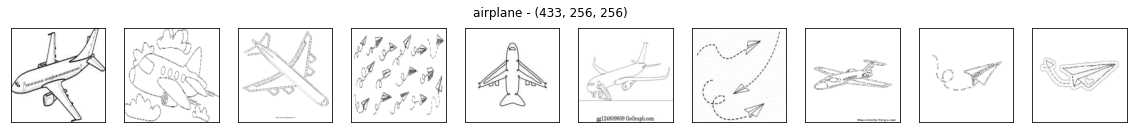

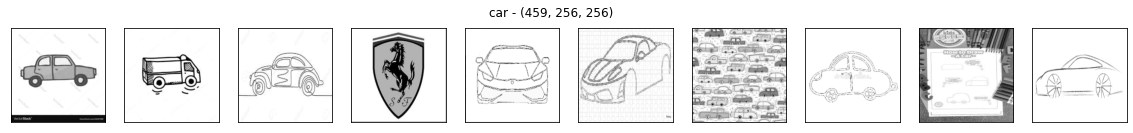

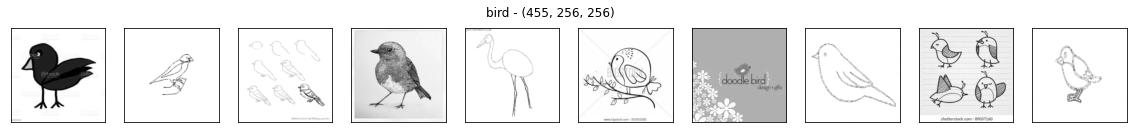

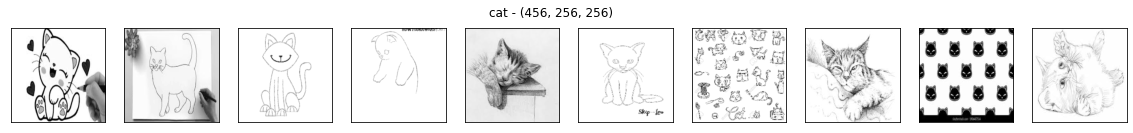

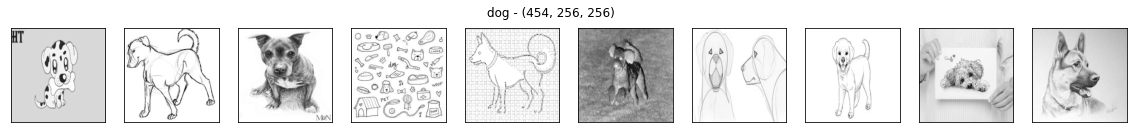

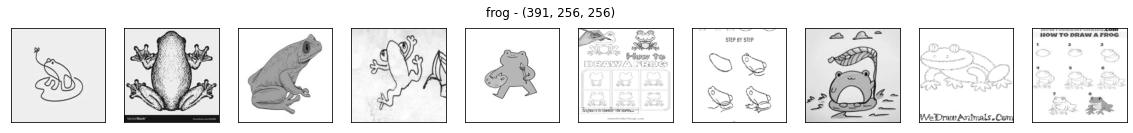

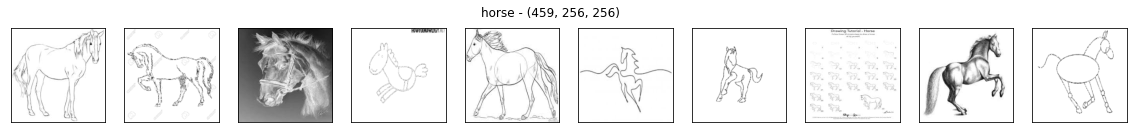

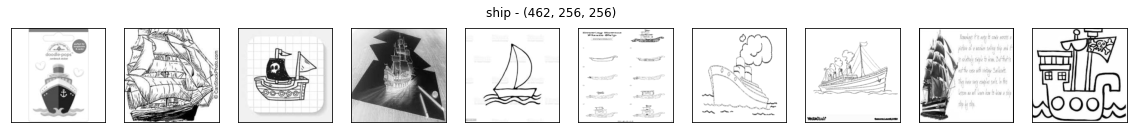

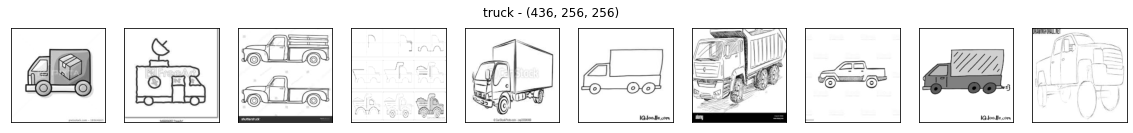

In [47]:
plot_dataset(google_doodle)

# Google Images Real

In [23]:
classes = ["airplane", "car", "bird", "cat", "dog", "frog", "horse", "ship", "truck"]

urls_dataset = {c: [] for c in classes}
for c in classes:
    results = search_images(c)
    urls = [r['thumbnail'] for r in results['images_results']]
    urls_dataset[c] += urls

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [26]:
# with open('dataset/google_images/real.json', 'w') as f:
#     json.dump(urls_dataset, f)
with open("dataset/google_images/real.json", "r") as f:
    urls_dataset = json.load(f)

In [34]:
def preprocess_img(img):
    img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_AREA)
    # if (img < 255/2).sum() > 256*256/2:
    #     img = flip_img(img)
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img

In [35]:
def collect_dataset(d):
    dataset = {c: [] for c in classes}
    for clas, urls in d.items():
        for url in urls:
            img = download_image(url)
            img = preprocess_img(img)
            dataset[clas].append(img)
    dataset = {c: np.asarray(imgs) for c, imgs in dataset.items()}
    return dataset

In [36]:
google_real = collect_dataset(urls_dataset)

In [43]:
for clas, data in google_real.items():
    print(clas, data.shape)
    uniques = np.unique([tuple(row) for row in data], axis=0)
    print(clas, uniques.shape)
    google_real[clas] = uniques

airplane (108, 256, 256, 3)
airplane (105, 256, 256, 3)
car (100, 256, 256, 3)
car (100, 256, 256, 3)
bird (100, 256, 256, 3)
bird (100, 256, 256, 3)
cat (100, 256, 256, 3)
cat (100, 256, 256, 3)
dog (100, 256, 256, 3)
dog (100, 256, 256, 3)
frog (100, 256, 256, 3)
frog (100, 256, 256, 3)
horse (100, 256, 256, 3)
horse (100, 256, 256, 3)
ship (100, 256, 256, 3)
ship (100, 256, 256, 3)
truck (100, 256, 256, 3)
truck (100, 256, 256, 3)


In [48]:
print("Image shape:", google_real['airplane'].shape[1:])
print("No. classes:", len(google_real.keys()))
print("Classes:", ', '.join(google_real.keys()))
print("Count per class:")
size = 0
for category, data in google_real.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 105
   car - 100
   bird - 100
   cat - 100
   dog - 100
   frog - 100
   horse - 100
   ship - 100
   truck - 100
Dataset size: 905


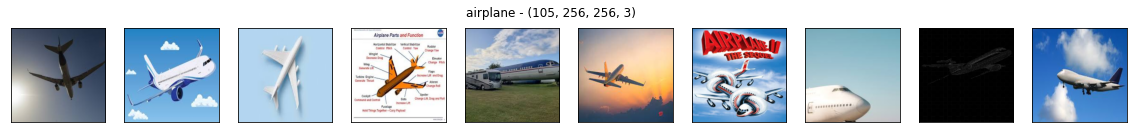

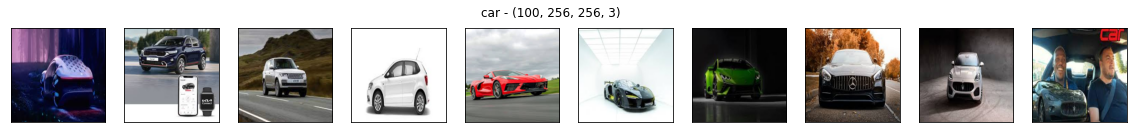

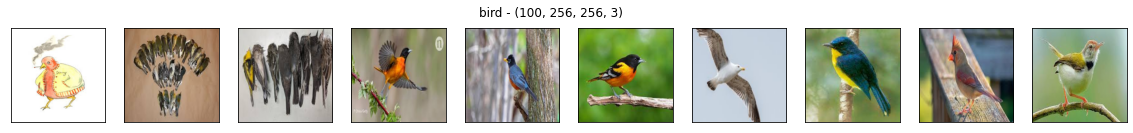

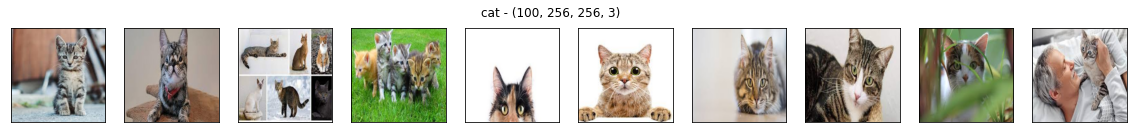

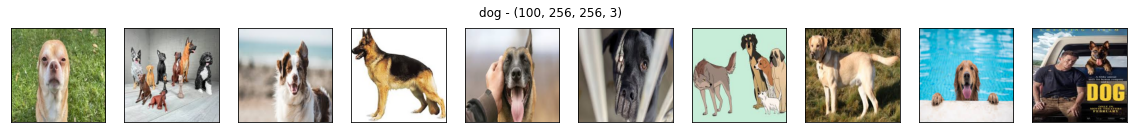

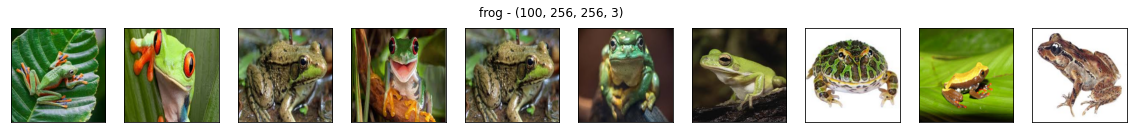

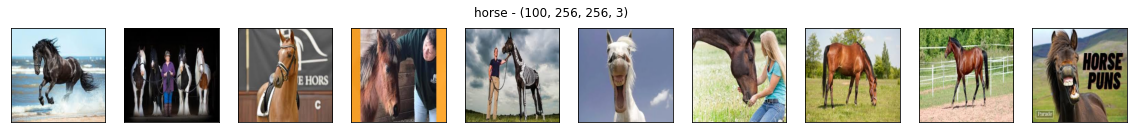

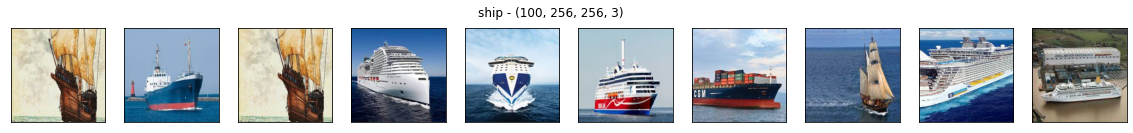

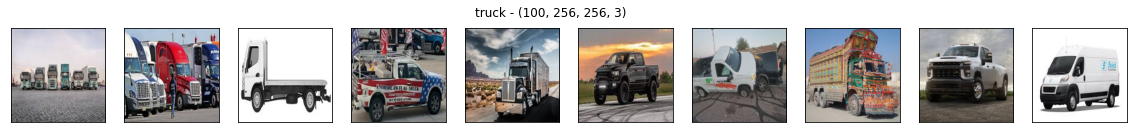

In [49]:
plot_dataset(google_real)

In [52]:
np.save("dataset/google_images/google_real.npy", google_real)
dataset = np.load('dataset/google_images/google_real.npy', allow_pickle=True)[()]

In [53]:
dataset.keys()

dict_keys(['airplane', 'car', 'bird', 'cat', 'dog', 'frog', 'horse', 'ship', 'truck'])